# Computer Vision Histograms

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img):
    plt.figure(figsize=(20,15))
    plt.imshow(img[:,:,::-1])

In [3]:
!ls img

4.png		      day1.jpg	night1.jpg  noisy.png		scan.jpg
blue-flowers.jpg      day2.jpg	night2.jpg  notes.png		sketch.png
blue-red-flowers.png  day3.jpg	night3.png  n.png		text.png
clean-text.jpg	      day4.jpg	night4.jpg  purple-flowers.jpg


In [6]:
image=cv2.imread('img/blue-red-flowers.png')
# cv2.imshow('image',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Histograms

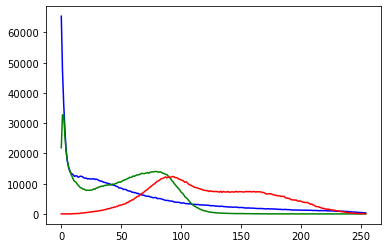

In [15]:
# Load some images, calculate and plot their color histograms, one color at the time
# try it with different color spaces BGR, HSV, etc
colors=['b','g','r']
for i, color in enumerate(colors):

    hist_blue = cv2.calcHist([image], [i], None, [255], [0, 255])
    plt.plot(hist_blue, color=color)
plt.show()
hsv_image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)


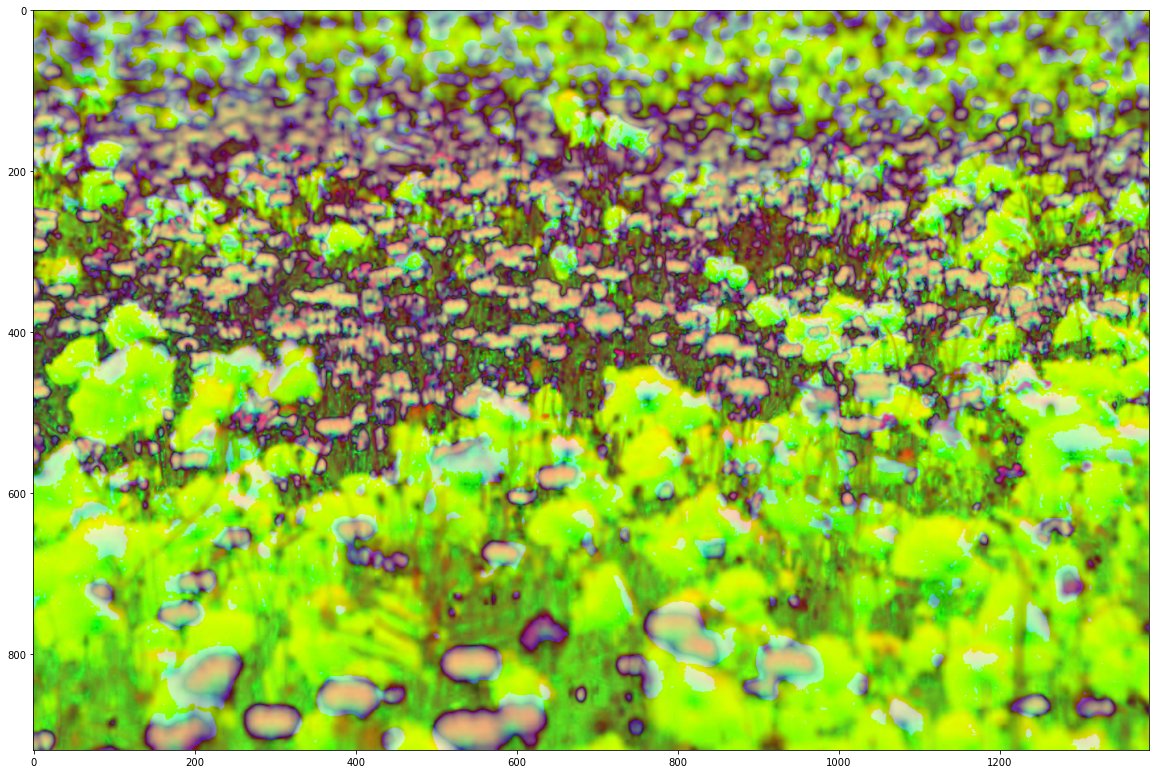

In [17]:
imshow(hsv_image)

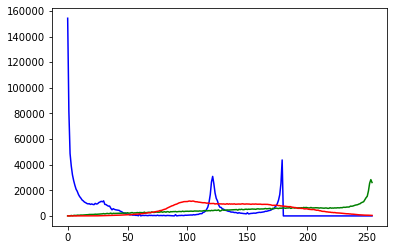

In [16]:
hsv_image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

for i, color in enumerate(colors):

    hist_blue = cv2.calcHist([hsv_image], [i], None, [255], [0, 255])
    plt.plot(hist_blue, color=color)
plt.show()

[Hint](# "cv2.calcHist") 


In [ ]:
# Now try to plot all 3 channels at the same time, does the histogram give you an idea of what the image looks like?


## Mini project

### Level 1

#### Image classifier

1. By using only computer vision techniques (no Neural Networks and ML are not allowed) create a binary classifier that can detect if a picutre was taken during the day, you can use the images day/night in the img folder or feel free to add your own images.

In [1]:
!ls img

blue-flowers.jpg     day3.jpg             night3.png
blue-red-flowers.png day4.jpg             night4.jpg
day1.jpg             night1.jpg           purple-flowers.jpg
day2.jpg             night2.jpg


In [8]:
day1=cv2.imread('img/day1.jpg')
day2=cv2.imread('img/day2.jpg')
day3=cv2.imread('img/day3.jpg')
day4=cv2.imread('img/day4.jpg')
night1=cv2.imread('img/night1.jpg')
night2=cv2.imread('img/night2.jpg')
night3=cv2.imread('img/night3.png')
night4=cv2.imread('img/night4.jpg')


In [56]:
for i in img_list[4:]:
    l=average_bright(i)
    print(l)

89.77803928571429
78.19154285714286
91.49875714285714
52.774235714285716


In [57]:
for i in img_list[:4]:
    l=average_bright(i)
    print(l)

152.833025
133.17815357142857
186.9486892857143
184.60994285714287


In [6]:
def resize_img(img):
    img=cv2.resize(img,(700,400))
    return img
def convert_hsv(img):
    img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    return img



def average_bright(img):
    img=resize_img(img)
    hsv=convert_hsv(img)
    brighness=np.sum(hsv[:,:,2])
    area=img.shape[0]*img.shape[1]
    av_br=brighness/area
    return av_br

In [4]:
def classifier(train):
    for i in train:
        b=average_bright(i)
        if b>100:
             print (" -- Day ")
        else:
            print(" -- Night ")
        

In [14]:
import random
import pandas as pd
img_list=[day1,day2,day3,day4,night1,night2,night3,night4]
random.shuffle(img_list)


In [15]:
classifier(img_list)

 -- Day 
 -- Night 
 -- Night 
 -- Night 
 -- Day 
 -- Day 
 -- Night 
 -- Day 


### Level 2

#### Image Classifier

1. This should be an easy one, change the classifier so it can also detect night pictures